<a href="https://colab.research.google.com/github/Schimmenti/Creep/blob/master/Creep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
def center(z):
    # "-1" profiles
    # sum of columns
    mask1 = (z==-1).sum(axis=0)
    # sum of rows
    mask2 = (z==-1).sum(axis=1)
    # column at which we find the actual interface
    max1 = mask1.max()
    boundary1 = np.argwhere(mask1 == max1).flatten()
    lb1 = np.argmax(np.diff(boundary1))
    # row at which we find the actual interface
    max2 = mask2.max()
    boundary2 = np.argwhere(mask2==max2).flatten()
    lb2 = np.argmax(np.diff(boundary2))
    # actual boundary
    minb_1, maxb_1 = boundary1[lb1],boundary1[lb1+1] #lateral figure
    minb_2, maxb_2 = boundary2[lb2],boundary2[lb2+1]
    xc = (minb_1+maxb_1)/2
    yc = (minb_2+maxb_2)/2
    radius_x = (maxb_1-minb_1)/2
    radius_y = (maxb_2-minb_2)/2
    return xc,yc,radius_x,radius_y

In [11]:
base_link = 'https://raw.githubusercontent.com/Schimmenti/Creep/master/file_field%1.2f.csv'

In [12]:
field = 0.13
data = pd.read_csv(base_link % field, header=None).values

In [24]:
timesteps, amounts = np.unique(data,return_counts=True)
timesteps = timesteps[1:]
amounts = amounts[1:]
T = timesteps.max() + 1

In [77]:
topplings = np.zeros(T)
topplings[timesteps] = amounts
area = np.cumsum(topplings)

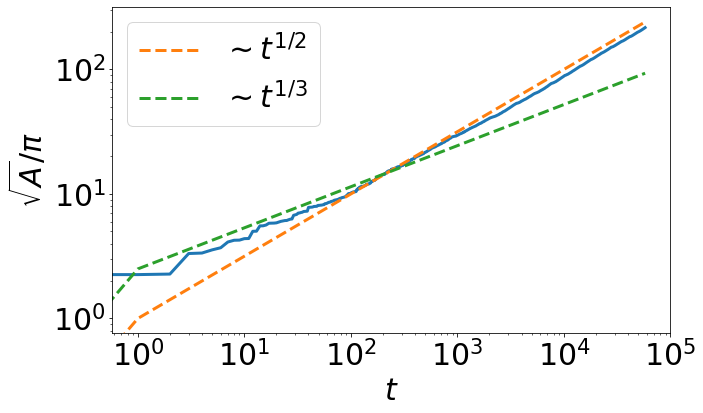

In [78]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(np.sqrt(area)/np.pi, lw=3)
plt.plot(np.arange(0,T), np.arange(0,T)**0.5, label='$\sim t^{1/2}$', ls='dashed', lw=3)
plt.plot(np.arange(0,T), 2.5*np.arange(0,T)**0.33, label='$\sim t^{1/3}$', ls='dashed', lw=3)
plt.ylabel("$\sqrt{A}/\pi$", fontsize=30)
plt.xlabel("$t$", fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=30)
plt.show()

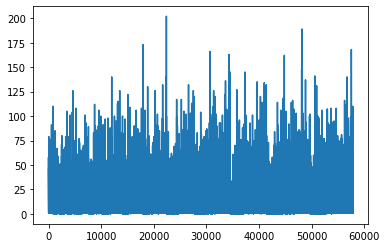

In [79]:
plt.plot(topplings)